<a href="https://colab.research.google.com/github/rodolphojung/Data-Science-and-Analytics/blob/main/PySparkPyArrowCrimData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the dataset

In [2]:
!wget https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/crime.csv -q -O crime.csv

In [3]:
import pandas as pd
filename = './crime'

df = pd.read_csv(f'./{filename}.csv')

In [4]:
df.head()

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude
0,0,9446824,HX100141,01/01/2014 02:00:00 AM,0000X W ILLINOIS ST,0460,BATTERY,SIMPLE,STREET,False,False,1831,18,42.0,8.0,08B,41.890828,-87.630235
1,1,9446748,HX100020,01/01/2014 12:00:00 AM,006XX N DEARBORN ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1832,18,42.0,8.0,06,41.893542,-87.629702
2,2,9446758,HX100030,01/01/2014 12:30:00 AM,052XX W RACE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,1523,15,28.0,25.0,14,41.890046,-87.756333
3,3,9446760,HX100027,01/01/2014 12:30:00 AM,053XX W WELLINGTON AVE,0460,BATTERY,SIMPLE,APARTMENT,True,False,2514,25,31.0,19.0,08B,41.935011,-87.759739
4,4,9446764,HX100054,01/01/2014 12:10:00 AM,014XX W LEXINGTON ST,0460,BATTERY,SIMPLE,STREET,False,False,1231,12,25.0,28.0,08B,41.872509,-87.663069


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274423 entries, 0 to 274422
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 274423 non-null  int64  
 1   ID                    274423 non-null  int64  
 2   Case Number           274423 non-null  object 
 3   Date                  274423 non-null  object 
 4   Block                 274423 non-null  object 
 5   IUCR                  274423 non-null  object 
 6   Primary Type          274423 non-null  object 
 7   Description           274423 non-null  object 
 8   Location Description  274247 non-null  object 
 9   Arrest                274423 non-null  bool   
 10  Domestic              274423 non-null  bool   
 11  Beat                  274423 non-null  int64  
 12  District              274423 non-null  int64  
 13  Ward                  274421 non-null  float64
 14  Community Area        274422 non-null  float64
 15  

We see that the df has about 275k rows and 18 columns

In [6]:
agg_df = df['Location Description'].value_counts()

In [7]:
agg_df

STREET                     63057
RESIDENCE                  43139
APARTMENT                  35041
SIDEWALK                   30901
OTHER                      10735
                           ...  
GAS STATION DRIVE/PROP.        1
BASEMENT                       1
VESTIBULE                      1
NURSING HOME                   1
GOVERNMENT BUILDING            1
Name: Location Description, Length: 119, dtype: int64

In [8]:
df.to_parquet('./crime.parquet', engine = 'pyarrow')

In [9]:
df.to_parquet('./crime.parquet.gzip', engine = 'pyarrow', compression = 'gzip')

Showing the size of the files on drive

In [10]:
import os

extensions = ['csv', 'parquet','parquet.gzip']

for extension in extensions:
  size = os.path.getsize(f'{filename}.{extension}')
  size_mb = round(size /1024 / 1024, 2)

  print (f'{extension}:{size_mb} MB')

csv:44.72 MB
parquet:11.66 MB
parquet.gzip:8.32 MB


In [11]:
!pip install pyarrow==7.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from pyarrow import csv
import pyarrow as pa
import pandas as pd

filename = './crime'

table = csv.read_csv(f'{filename}.csv')
df = pd.read_csv(f'./{filename}.csv')

Aggregation Using Pandas

In [14]:
agg_df = df['Location Description'].value_counts()

Aggregation using PyArrow

In [19]:
agg_table = table.group_by('Location Description').aggregate([('Location Description', 'count')])
agg_table

pyarrow.Table
Location Description_count: int64
Location Description: string
----
Location Description_count: [[63057,1827,35041,5451,43139,30901,10735,7458,4861,1139,...,3,2,5,3,1,1,3,2,2,1]]
Location Description: [["STREET","BAR OR TAVERN","APARTMENT","RESIDENTIAL YARD (FRONT/BACK)","RESIDENCE","SIDEWALK","OTHER","PARKING LOT/GARAGE(NON.RESID.)","RESIDENCE PORCH/HALLWAY","CTA PLATFORM",...,"GANGWAY","GARAGE","PARKING LOT","VACANT LOT","GAS STATION DRIVE/PROP.","BASEMENT","DRIVEWAY","CHA PARKING LOT","BARBER SHOP/BEAUTY SALON","GOVERNMENT BUILDING"]]

Difference in size using PyArrow and Pandas

In [26]:
import sys 

objects = [{'pandas': df}, {'pyarrow': table}]

for obj_dict in objects:
  for id, obj in obj_dict.items():

    size = sys.getsizeof(obj)
    size_mb = round(size / 1024 / 1024, 2)

    print(f'{id}: {size_mb} MB')

pandas: 178.39 MB
pyarrow: 49.47 MB


To work with partitioned data, we create a reference date for each column

In [20]:
filename = './crime'
df = pd.read_csv(f'./{filename}.csv')

In [21]:
from datetime import datetime

df['reference_date'] = df['Date'].apply(lambda date:datetime.strptime(date.split(sep = ' ')[0], '%m/%d/%Y').strftime('%Y-%m-%d'))

In [22]:
df.tail()

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,reference_date
274418,274418,10362481,HY554205,08/15/2014 09:00:00 PM,048XX N CLARK ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,APARTMENT,False,False,2032,20,46.0,3.0,11,NaN,NaN,2014-08-15
274419,274419,10362558,HY554336,08/31/2014 03:00:00 AM,028XX W 19TH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING/GROUNDS,False,False,1022,10,12.0,30.0,02,NaN,NaN,2014-08-31
274420,274420,10363233,HY554972,02/20/2014 12:00:00 PM,046XX W NORTH AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,2533,25,37.0,25.0,11,NaN,NaN,2014-02-20
274421,274421,10363368,HY555019,09/02/2014 09:00:00 AM,047XX N BEACON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1913,19,46.0,3.0,11,NaN,NaN,2014-09-02
274422,274422,10364473,HY556366,12/04/2014 09:00:00 AM,012XX W LUNT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,2431,24,49.0,1.0,11,NaN,NaN,2014-12-04


In [24]:
agg_df = pd.DataFrame(df['reference_date'].value_counts()).sort_index().reset_index()
agg_df = agg_df.rename(columns = {'reference_date':'amount'})
agg_df = agg_df.rename(columns = {'index':'reference_date'})

In [25]:
agg_df.tail()

,reference_date,amount
360,2014-12-27,716
361,2014-12-28,631
362,2014-12-29,677
363,2014-12-30,570
364,2014-12-31,577


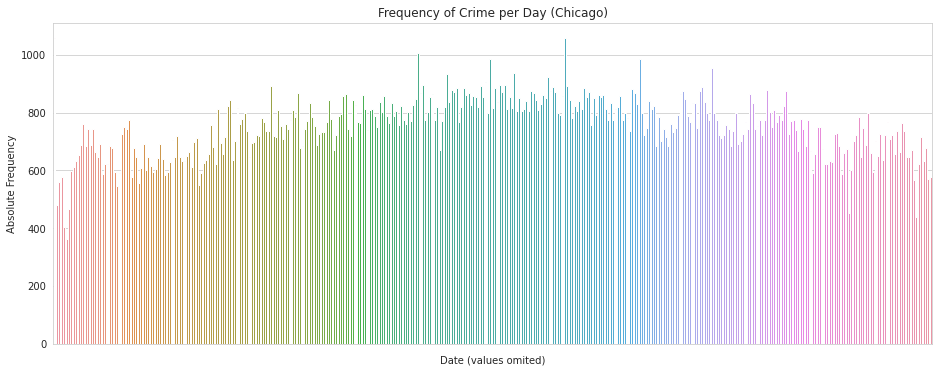

In [29]:
import seaborn as sns
with sns.axes_style('whitegrid'):
  chart = sns.barplot(x = 'reference_date', y = 'amount', data = agg_df)
  chart.set(xticklabels = [])
  chart.set(title = 'Frequency of Crime per Day (Chicago)', xlabel = 'Date (values omited)', ylabel = 'Absolute Frequency')
  chart.figure.set_size_inches(w = 40/2.54, h = 15/2.54)

In [30]:
df.to_parquet('./crime', engine = 'pyarrow', compression = 'gzip', partition_cols = 'reference_date')

In [31]:
df.to_csv('./crime_enriched.csv', sep = ',', index = False)

Connecting to Amazon S3

In [32]:
from getpass import getpass

aws_access_key_id = getpass()

··········


In [33]:
from getpass import getpass

aws_secret_access_key = getpass()

··········


In [34]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.1/135.1 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 55.2 MB/s eta 0:00:00


In [36]:
import boto3

client = boto3.client(
    's3',
    aws_access_key_id = aws_access_key_id,
    aws_secret_access_key = aws_secret_access_key
)

In [38]:
import os

BUCKET = 'mod42ebacparquet'

i = 0

for root, dirs, files in os.walk('./crime'):
  elapsed = f'{round(100*i/365,2)} %'
  print(elapsed)
  for file in files:
    path = os.path.join(root,file)
    bucket_path = '/'.join(path.split(sep = '/')[2:])
    client.upload_file(path, BUCKET, bucket_path)
  i = i+1

0.0 %
0.27 %
0.55 %
0.82 %
1.1 %
1.37 %
1.64 %
1.92 %
2.19 %
2.47 %
2.74 %
3.01 %
3.29 %
3.56 %
3.84 %
4.11 %
4.38 %
4.66 %
4.93 %
5.21 %
5.48 %
5.75 %
6.03 %
6.3 %
6.58 %
6.85 %
7.12 %
7.4 %
7.67 %
7.95 %
8.22 %
8.49 %
8.77 %
9.04 %
9.32 %
9.59 %
9.86 %
10.14 %
10.41 %
10.68 %
10.96 %
11.23 %
11.51 %
11.78 %
12.05 %
12.33 %
12.6 %
12.88 %
13.15 %
13.42 %
13.7 %
13.97 %
14.25 %
14.52 %
14.79 %
15.07 %
15.34 %
15.62 %
15.89 %
16.16 %
16.44 %
16.71 %
16.99 %
17.26 %
17.53 %
17.81 %
18.08 %
18.36 %
18.63 %
18.9 %
19.18 %
19.45 %
19.73 %
20.0 %
20.27 %
20.55 %
20.82 %
21.1 %
21.37 %
21.64 %
21.92 %
22.19 %
22.47 %
22.74 %
23.01 %
23.29 %
23.56 %
23.84 %
24.11 %
24.38 %
24.66 %
24.93 %
25.21 %
25.48 %
25.75 %
26.03 %
26.3 %
26.58 %
26.85 %
27.12 %
27.4 %
27.67 %
27.95 %
28.22 %
28.49 %
28.77 %
29.04 %
29.32 %
29.59 %
29.86 %
30.14 %
30.41 %
30.68 %
30.96 %
31.23 %
31.51 %
31.78 %
32.05 %
32.33 %
32.6 %
32.88 %
33.15 %
33.42 %
33.7 %
33.97 %
34.25 %
34.52 %
34.79 %
35.07 %
35.34 %
35.62 %
35